# Levich and Koutechy-Levich analysis notebook for CV data.

## 1. Import needed libraries

In [1]:
from pathlib import Path
from ec4py import *
from ec4py import Quantity_Value_Unit as QV

## 2.Make a list of paths to the data files.

In [ ]:
paths = []
path_to_dataSetFolder = Path(".").cwd().parent.parent / "test_data" /"CV" / "MWE" / "Cap"
print(path_to_dataSetFolder)
#paths.append( path_to_dataSetFolder / "CV_144913_ 3.tdms")
# paths.append( path_to_dataSetFolder / "CV_135307_ 3_MI.tdms")
#paths.append( path_to_dataSetFolder / "CV_140548_ 9_MI.tdms")
#paths.append( path_to_dataSetFolder / "CV_142109_ 8_MI.tdms")
paths.append( path_to_dataSetFolder / "CV_123313_ 1_MI")
paths.append( path_to_dataSetFolder / "CV_141031_ 3_MI.tdms")
paths.append( path_to_dataSetFolder / "CV_141010_ 3_MI.tdms")




c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\CV\MWE


## 3. Load in the data files

(<matplotlib.lines.Line2D at 0x20cbb254590>,
 <Axes: xlabel='Voltage (V)', ylabel='Current (A)'>)

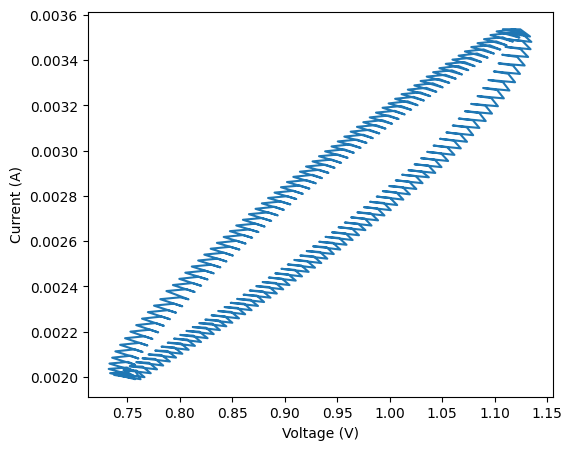

In [10]:
EC_Data(paths[0]).plot("E","i_4")

<Axes: xlabel='E vs RHE (V)', ylabel='i (A)'>

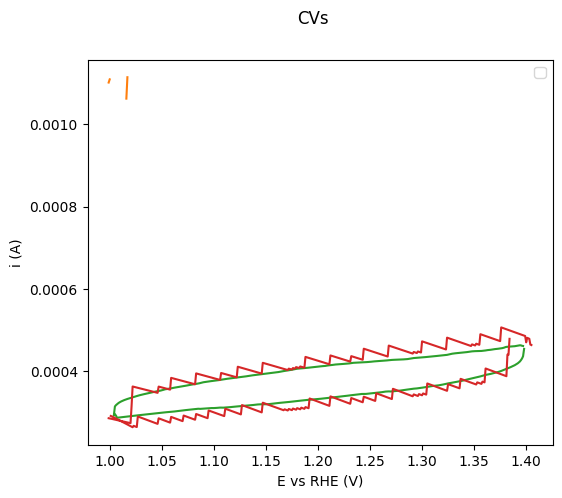

In [12]:
a=CV_Datas(paths,"i_2")
a.rate
a.plot(RHE)

In [13]:

a[1].get_i_at_E(1.2)



INDEX 3700 nan A


In [14]:
a.get_i_at_E(1.2)

INDEX 3700 nan A
INDEX 3700 nan A
INDEX 3700 nan A


([<ec4py.util.Quantity_Value_Unit at 0x20cb9756850>,
  <ec4py.util.Quantity_Value_Unit at 0x20cbb7724d0>])

<Axes: xlabel='E vs RHE (V)', ylabel='i A$^{-1}$ (A m$^{-2}$)'>

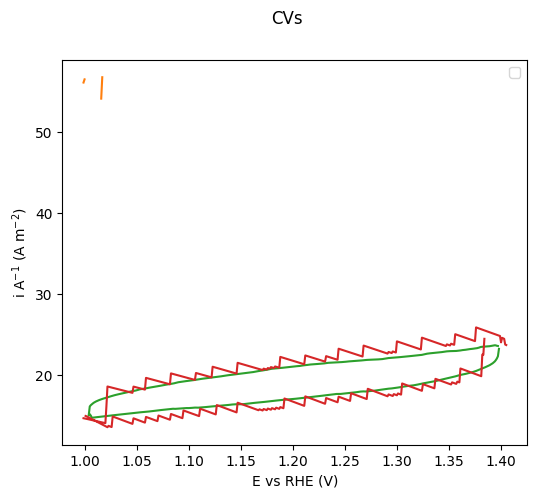

In [15]:
a.plot(RHE,AREA)

INDEX 3800 nan A
INDEX 3800 0.0003604610809155252 A
INDEX 3800 0.00034209083543250136 A
nan A


TypeError: Must be of the same type

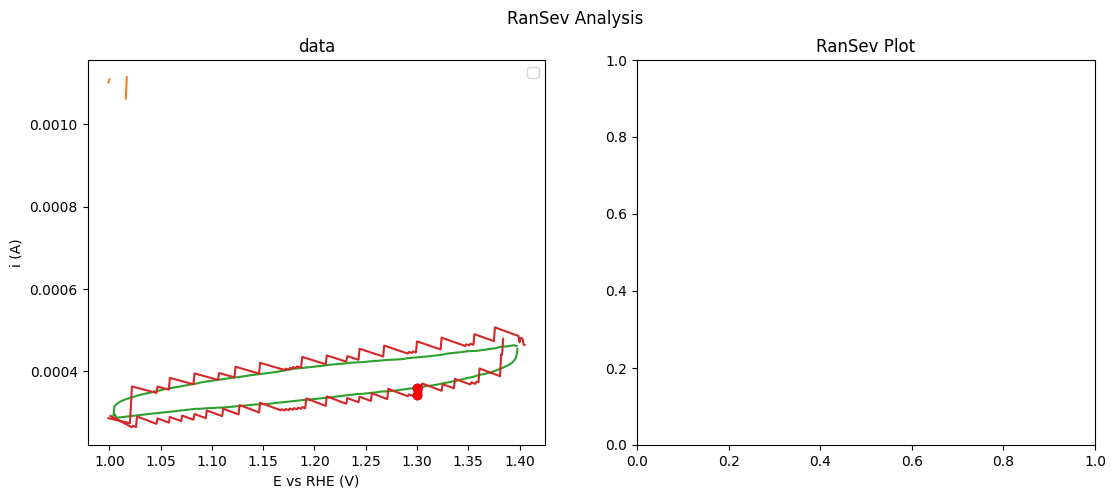

In [17]:
a.RanSev(1.3,RHE)

In [ ]:
CVs = CV_Datas(paths)
for cv in CVs:
    #cv.set_area(0.04532, "cm^2")
    cv.get_E_at_i
    print("aa", cv.area)

select a current channel
select a current channel
aa 1.960e-05 m^2
aa 1.960e-05 m^2


In [ ]:
CVs[1].plot(4,title = "aa")

TypeError: unsupported operand type(s) for /: 'list' and 'float'

In [ ]:
#plot = CVs.plot("" ,legend = "name", smooth_y=50)
CVs[1].plot(title = "aa")
for cv in CVs[:1]:
    print(cv.rate)
    cv2 = cv * (1 / 1000.)
    #cv2.plot()

#CVs.bg_corr(CVs)
CVs.plot(AREA, LEGEND.NAME)
CVs[0].plot(AREA, LEGEND.RATE)
bg_corr = CVs.bg_corr(path_to_dataSetFolder / "CV_144913_ 3.tdms" )

#bg_corr.plot()

## 4. Levich analysis

In [ ]:
slope1, slope2 = CVs.Levich(-0.5,"area_cm", y_smooth = 11, )
#use the argument to normalize the data

## 5. Koutechy-Levich analysis

In [ ]:
slope1, slope2 = CVs.KouLev(-0.5,"area", y_smooth = 5)
print(slope1 ** 1, slope1 ** -1)
#use the argument to normalize the data

In [ ]:
CVs[0].Tafel([-0.2, -0.1 ],-0.5)

In [ ]:
CVs.Tafel([-0.2, -0.1 ],-0.5)


#use the argument to normalize the data

In [ ]:
CVs.Tafel([-0.2, -0.1 ],-0.5)